In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd 
import sklearn 
import os
import matplotlib.pyplot as plt
import zipfile
import tqdm 
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy

#Reading the data

In [3]:
train_data=pd.read_csv("/Users/tnagaraghunandan/Desktop/Practice/AppliedAi/Assignment23/dataset/train.csv")
print('Train Data Shape ---->',train_data.shape)
print("\n")
test_data=pd.read_csv("/Users/tnagaraghunandan/Desktop/Practice/AppliedAi/Assignment23/dataset/test.csv")
print('Test Data Shape ----->',test_data.shape)

Train Data Shape ----> (4867421, 28)


Test Data Shape -----> (17965143, 28)


In [4]:
print("-------Train Data------\n")
train_data.info()
print("-------Test Data------\n")
test_data.info()

-------Train Data------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867421 entries, 0 to 4867420
Data columns (total 28 columns):
 #   Column      Dtype  
---  ------      -----  
 0   crew        int64  
 1   experiment  object 
 2   time        float64
 3   seat        int64  
 4   eeg_fp1     float64
 5   eeg_f7      float64
 6   eeg_f8      float64
 7   eeg_t4      float64
 8   eeg_t6      float64
 9   eeg_t5      float64
 10  eeg_t3      float64
 11  eeg_fp2     float64
 12  eeg_o1      float64
 13  eeg_p3      float64
 14  eeg_pz      float64
 15  eeg_f3      float64
 16  eeg_fz      float64
 17  eeg_f4      float64
 18  eeg_c4      float64
 19  eeg_p4      float64
 20  eeg_poz     float64
 21  eeg_c3      float64
 22  eeg_cz      float64
 23  eeg_o2      float64
 24  ecg         float64
 25  r           float64
 26  gsr         float64
 27  event       object 
dtypes: float64(24), int64(2), object(2)
memory usage: 1.0+ GB
-------Test Data------

<class 'pandas.core.frame

##EDA (Exploratory Data Analysis)

In [5]:
#Checking if both the columns are same or not
print(train_data.columns)
print(test_data.columns)

Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')
Index(['id', 'crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7',
       'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1',
       'eeg_p3', 'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4',
       'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr'],
      dtype='object')


In [7]:
# 1. Checking if duplicates are present/not
print("Duplicate in Training dataset : {} ".format(sum(train_data.duplicated())))
print("Duplicate in Testing dataset  : {} ".format(sum(test_data.duplicated())))

Duplicate in Training dataset : 0 
Duplicate in Testing dataset  : 0 


In [10]:
# 2. Checking if Null values are present/not
print("NaN values in Training dataset - {}".format(train_data.isnull().values.sum()))
print("NaN values in Testing dataset - {}".format(test_data.isnull().values.sum()))

NaN values in Training dataset - 0
NaN values in Testing dataset - 0


Total Event values of each category
A    2848809
C    1652686
D     235329
B     130597
Name: event, dtype: int64
--------------------------------------------------


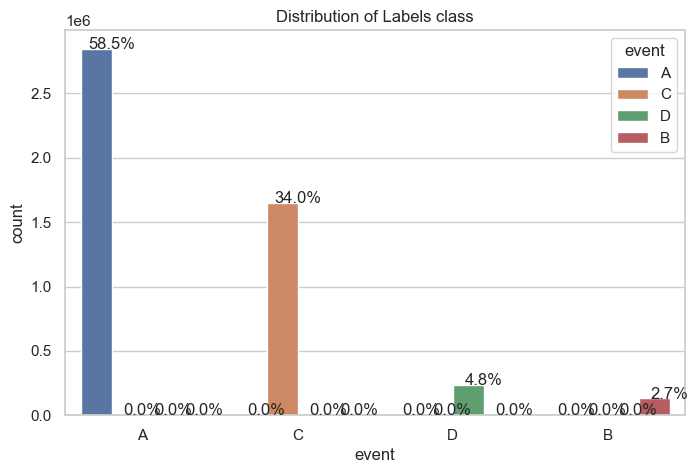

In [11]:
# Analysing the distribution of labels
print("Total Event values of each category")
print(train_data['event'].value_counts())

print("-"*50)
#Plotting the distribution
ax=sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(train_data))
ax = sns.countplot(x="event", hue="event", data=train_data)
plt.title("Distribution of Labels class")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/total)
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='center')
plt.show()


*   From above we can say that majority i.e. more than 50% of pts are of Baseline i.e. Class A
*   We can safely conclude that above dataset is imbalanced.



##Plotting Based Analysis

-------------------------------- Violen Plot --------------------------------


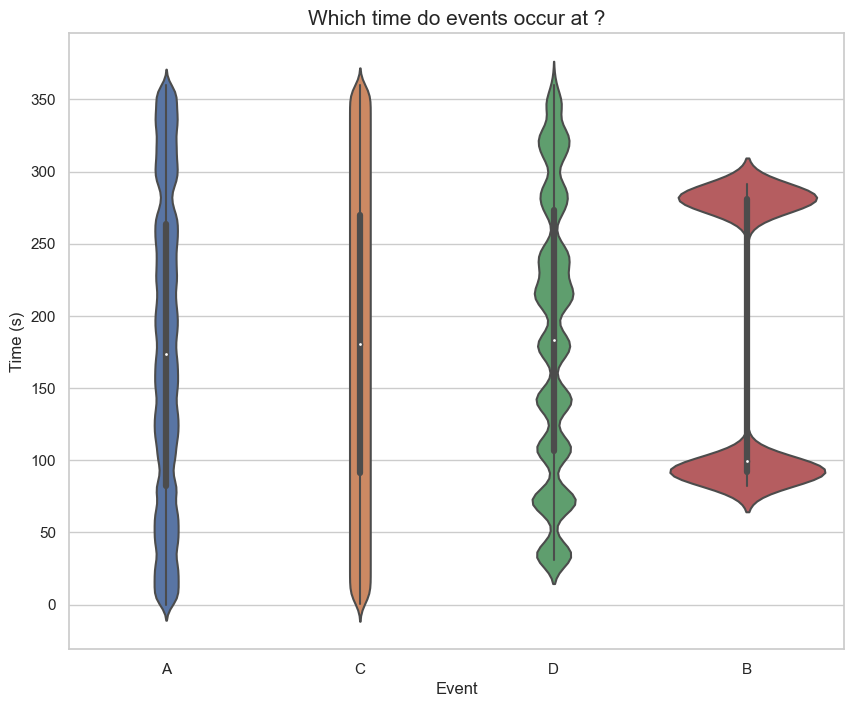

-------------------------------- Box Plot --------------------------------


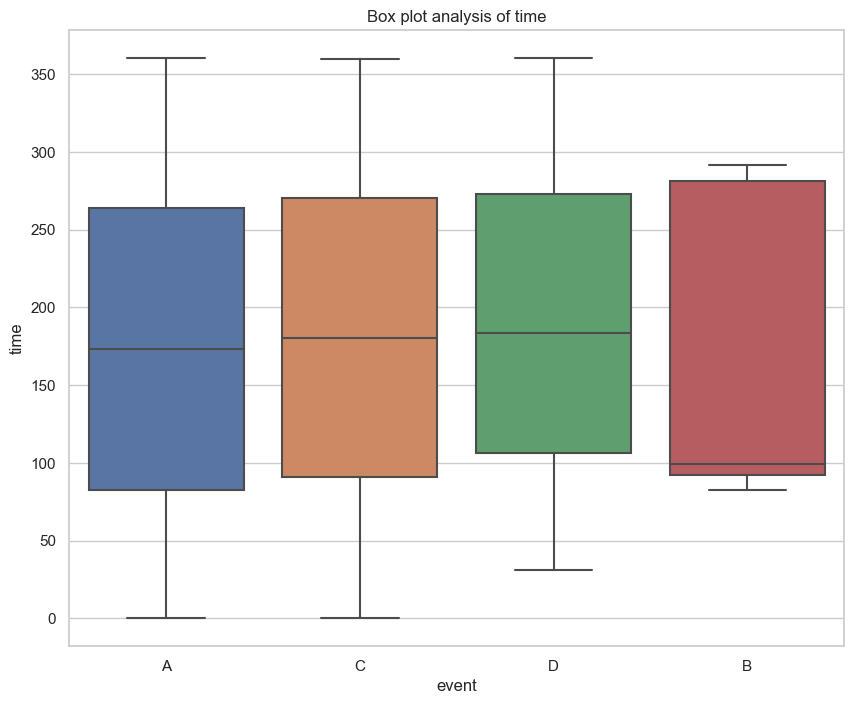

-------------------------------- PDF of time --------------------------------


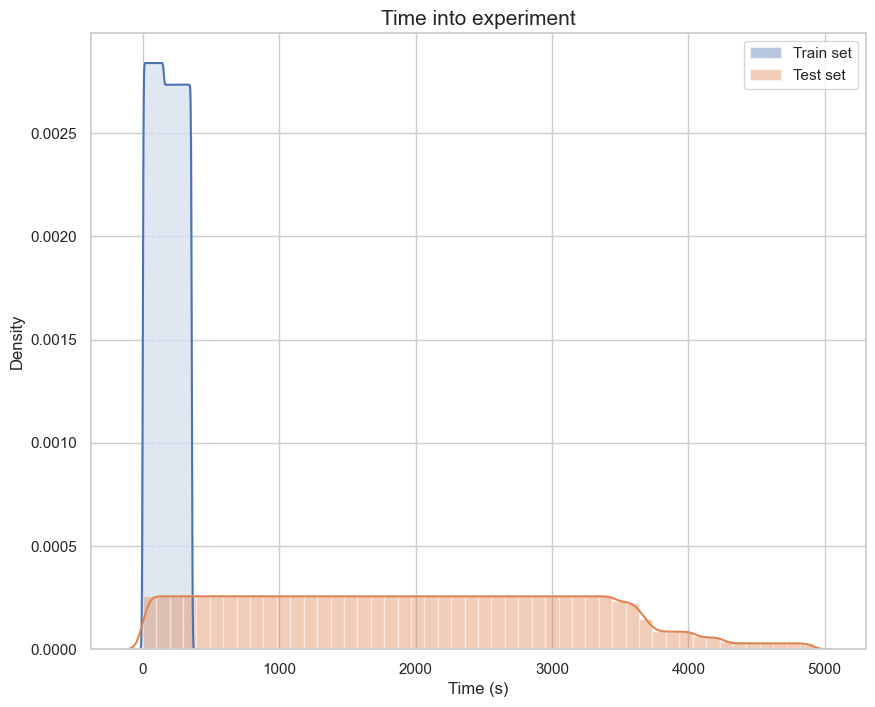

In [12]:
#-------------------------------- Time

print("-------------------------------- Violen Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.violinplot(x='event', y='time', data=train_data)
plt.ylabel("Time (s)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Which time do events occur at ?", fontsize=15)
plt.show()

print("-------------------------------- Box Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.boxplot(x='event', y='time', data=train_data)
plt.title("Box plot analysis of time")
plt.show()

print("-------------------------------- PDF of time --------------------------------")
plt.figure(figsize=(10,8))
sns.distplot(train_data['time'], label='Train set')
sns.distplot(test_data['time'], label='Test set')
plt.legend()
plt.xlabel("Time (s)", fontsize=12)
plt.title("Time into experiment", fontsize=15)
plt.show()



*  We can see event B's plot tells us that the values of the plot are present in the high and lower range of the time axis and there are very few values in the mid-range.

*  For other classes, the time feature is well distributed.

*   From the distplot, we can say that Time into the experiment is on an average between 0 to 360 sec.

*   From the above plot, we can understand that there is a huge difference in the Train and test time of the experiment.






-------------------------------- Violen Plot --------------------------------


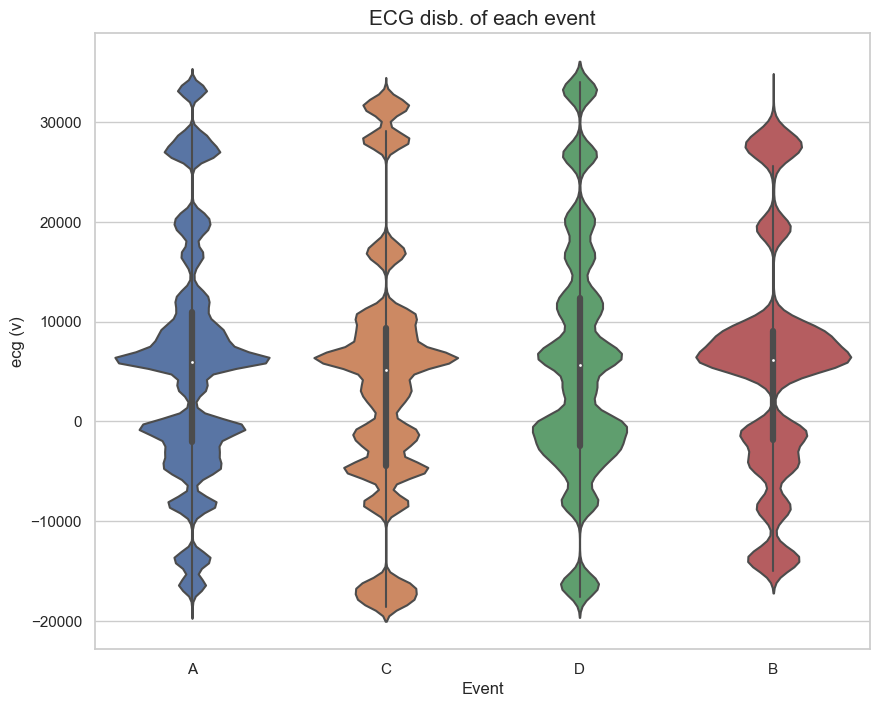

-------------------------------- Box Plot --------------------------------


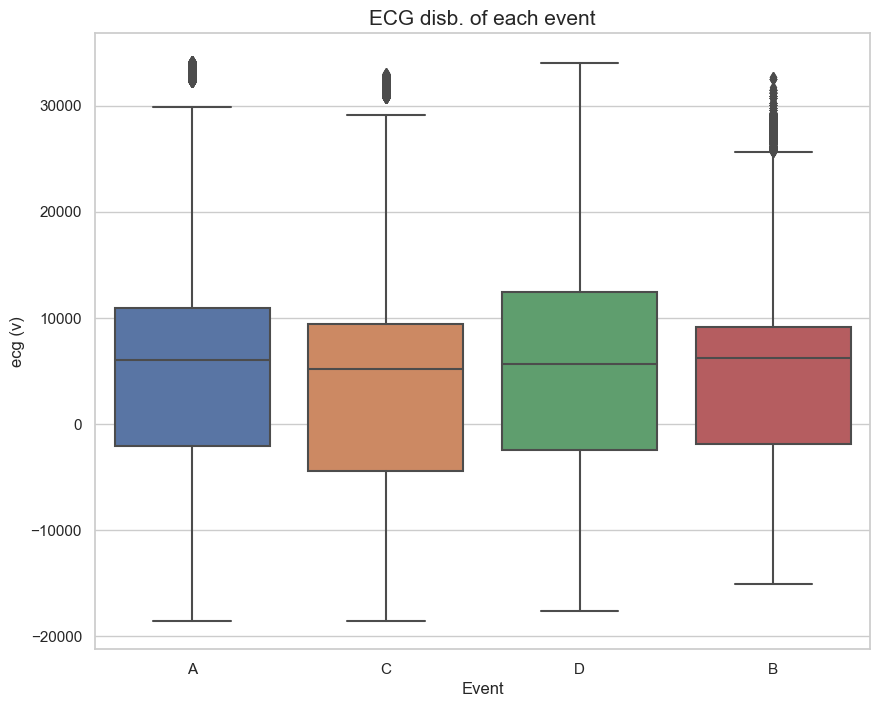

-------------------------------- PDF of time --------------------------------


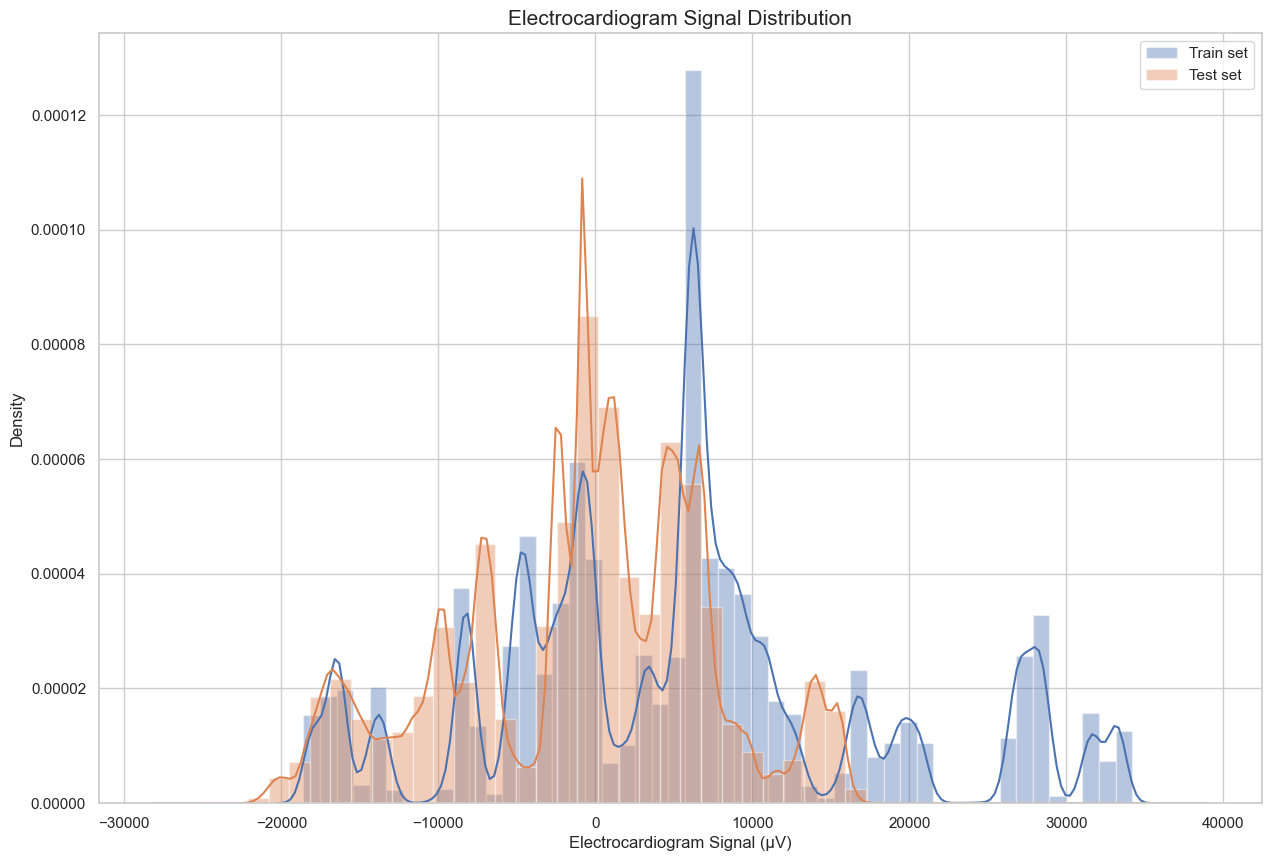

In [20]:
#-------------------------------- ECG

print("-------------------------------- Violen Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.violinplot(x='event', y='ecg', data=train_data)
plt.ylabel("ecg (v)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("ECG disb. of each event", fontsize=15)
plt.show()

print("-------------------------------- Box Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.boxplot(x='event', y='ecg', data=train_data)
plt.ylabel("ecg (v)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("ECG disb. of each event", fontsize=15)
plt.show()

print("-------------------------------- PDF of time --------------------------------")
plt.figure(figsize=(15,10))
sns.distplot(train_data['ecg'], label='Train set')
sns.distplot(test_data['ecg'], label='Test set')
plt.legend()
plt.xlabel("Electrocardiogram Signal (µV)", fontsize=12)
plt.title("Electrocardiogram Signal Distribution", fontsize=15)
plt.show()



* Violin plot tells us that for event A there are very few values in between range 22k to 25k uV.For event B there are very few values present between ecg values of 12k to 16k uV .For event C there are very few values between 19k to 25k uV. and -10k to -15k. For event D between -11k to -16k uV ecg microvolts, there are very few values present that's the basic thing which we can observe from the violin plot for ECG.

*  From the box plot, we can conclude that there are some outliers. Outliers may be useful in predicting the state, so for now let's keep them. Larger portions of data is covered under interval (-1000,10000). When ECG > 10000 microVolts, there is high chance for pilot to go into the DA state. When the value of ECG is too negative, the pilot is more likely to be in CA state.

*   From PDF for ecg we can conclude that the range is between -21k to +35k uV (approx). There is approixmately no much values in the range of 20k to 25k uV range in comparison to other range.







-------------------------------- Violen Plot --------------------------------


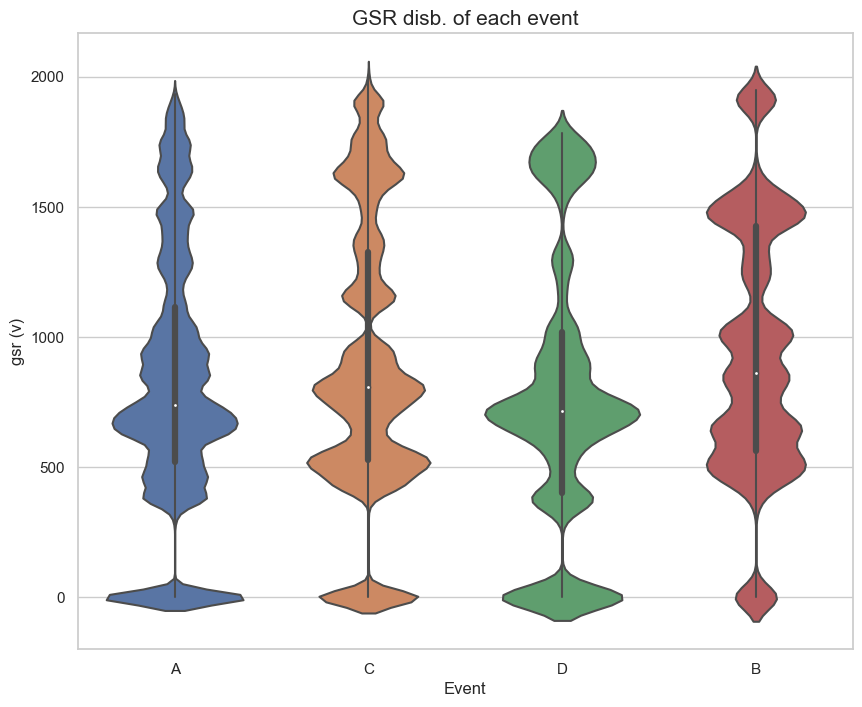

-------------------------------- Box Plot --------------------------------


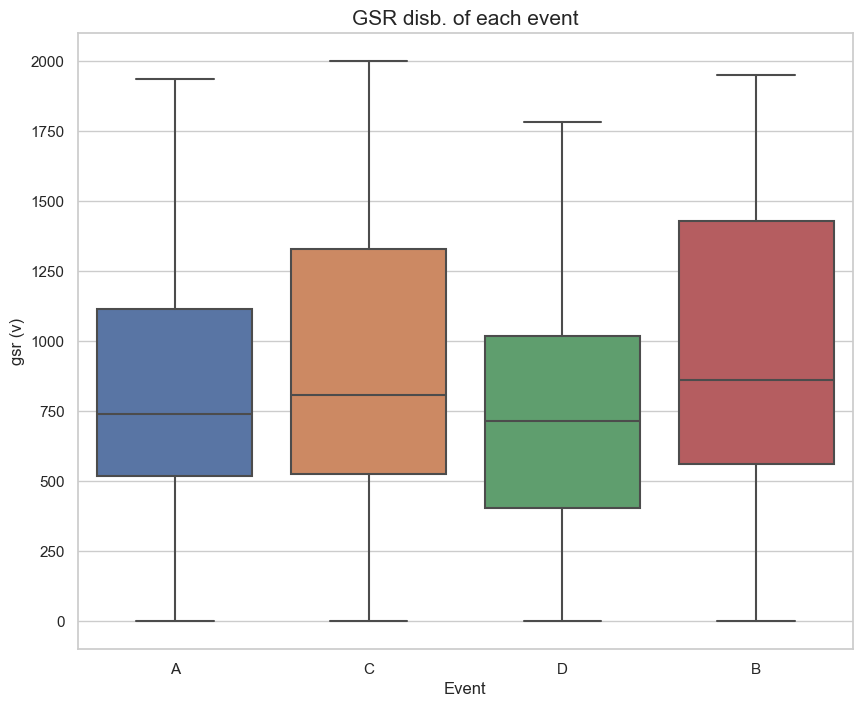

-------------------------------- PDF of time --------------------------------


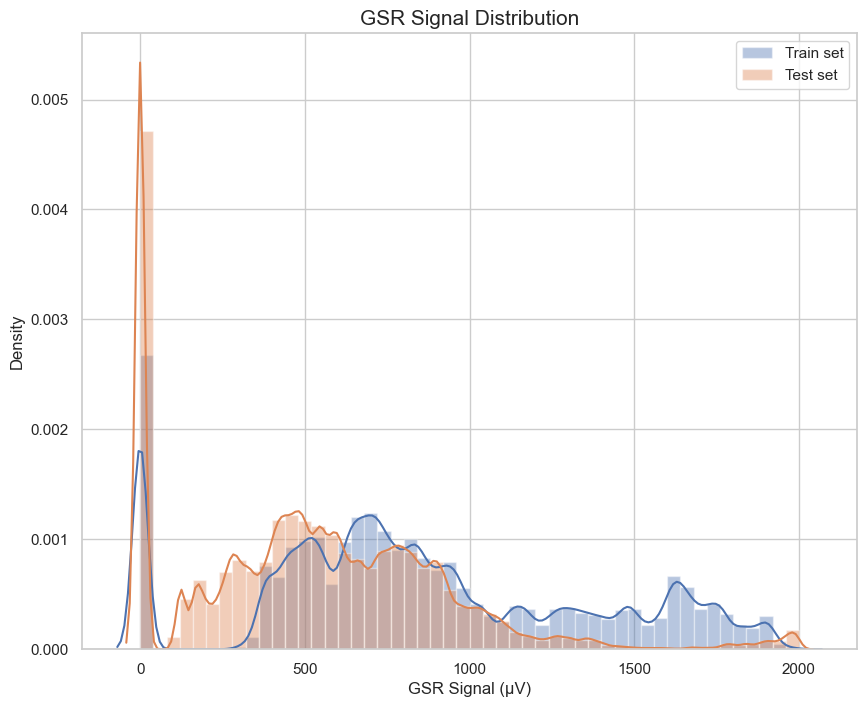

In [21]:
#-------------------------------- GSR (Galvanic Skin Response)

print("-------------------------------- Violen Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.violinplot(x='event', y='gsr', data=train_data)
plt.ylabel("gsr (v)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("GSR disb. of each event", fontsize=15)
plt.show()

print("-------------------------------- Box Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.boxplot(x='event', y='gsr', data=train_data)
plt.ylabel("gsr (v)", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("GSR disb. of each event", fontsize=15)
plt.show()

print("-------------------------------- PDF of time --------------------------------")
plt.figure(figsize=(10,8))
sns.distplot(train_data['gsr'], label='Train set')
sns.distplot(test_data['gsr'], label='Test set')
plt.legend()
plt.xlabel("GSR Signal (µV)", fontsize=12)
plt.title("GSR Signal Distribution", fontsize=15)
plt.show()




* From violin plo twe can conclude that there are no values of GSR in the range between 40 to 350 uV.  For other values, also we cant simply use any threshold for the GSR and use it to classify the event as all graphs looks almost similar.

*  GSR can play an important role, when we see the box plot. If the value from gsr is very high the pilot is more likely to be in SS state and if it is very low, the pilot is probably in DA state.

* PDF of GSR tells us that it has a range of 0 to 2000uV approximately.








-------------------------------- Violen Plot --------------------------------


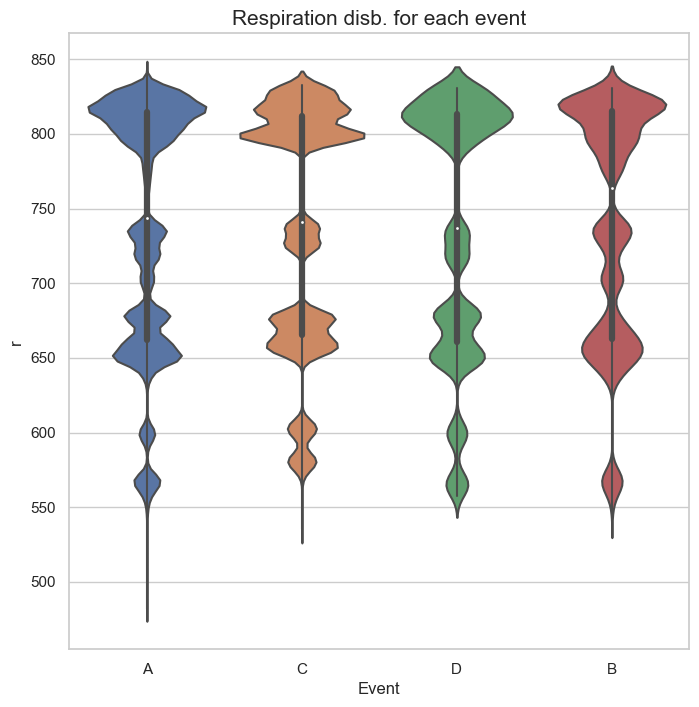

-------------------------------- Box Plot --------------------------------


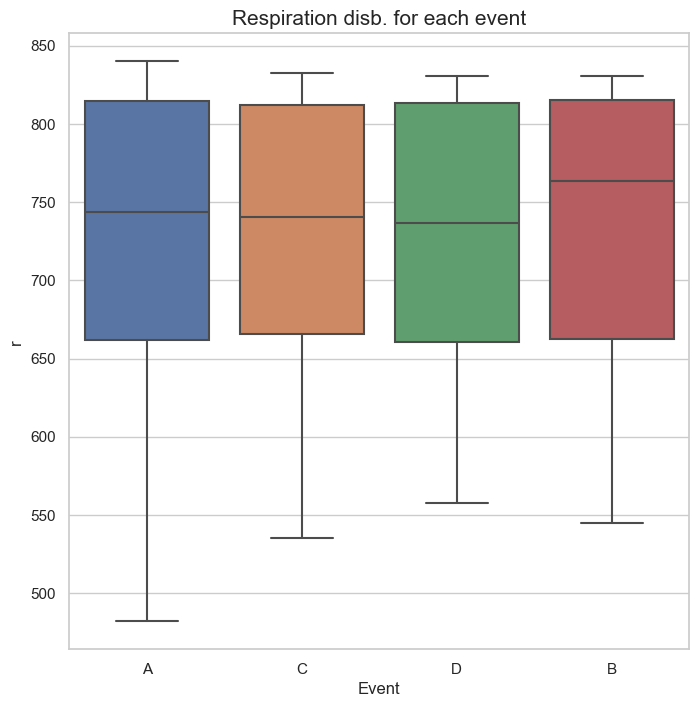

-------------------------------- PDF of time --------------------------------


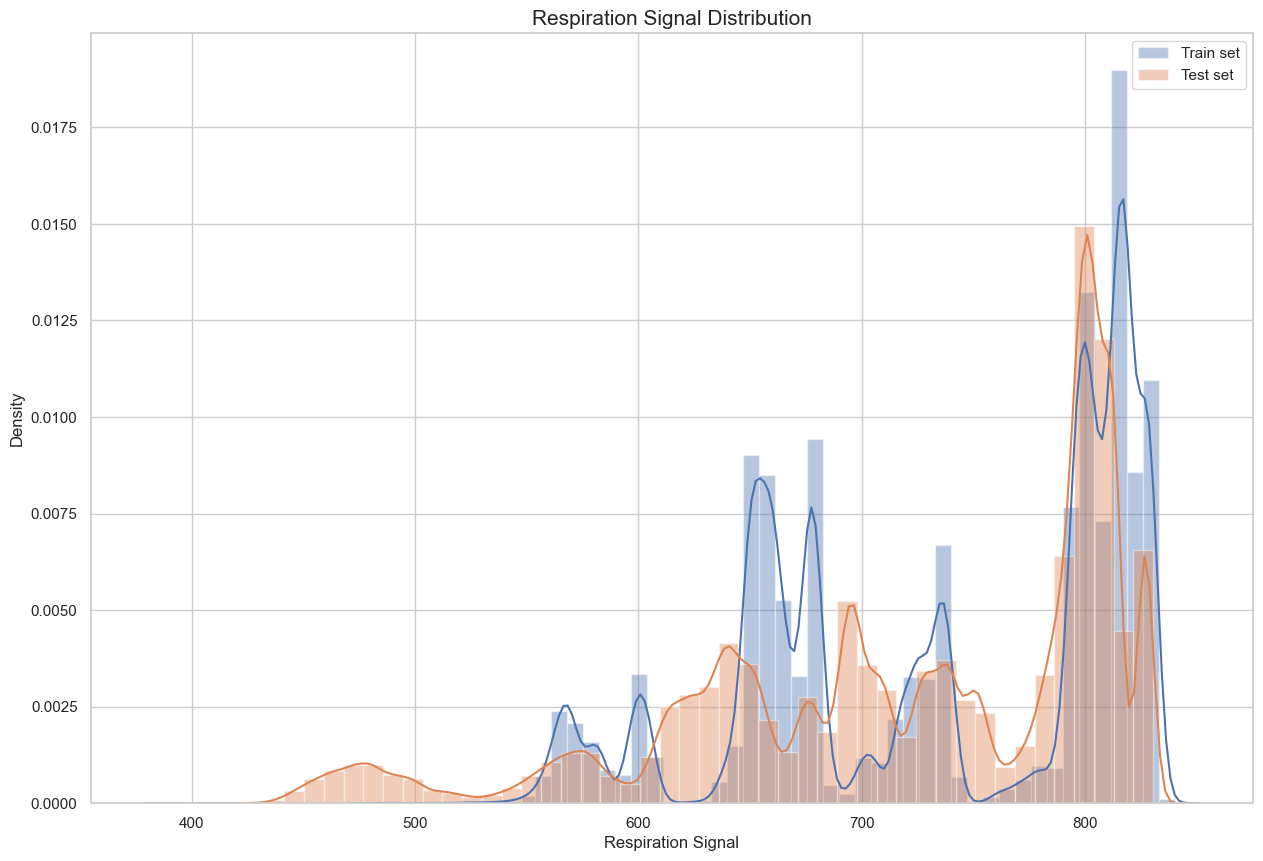

In [22]:
#-------------------------------- Respiration

print("-------------------------------- Violen Plot --------------------------------")
plt.figure(figsize=(8,8))
sns.violinplot(x='event', y='r', data=train_data)
plt.ylabel("r ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Respiration disb. for each event", fontsize=15)
plt.show()

print("-------------------------------- Box Plot --------------------------------")
plt.figure(figsize=(8,8))
sns.boxplot(x='event', y='r', data=train_data)
plt.ylabel("r ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Respiration disb. for each event", fontsize=15)
plt.show()

print("-------------------------------- PDF of time --------------------------------")
plt.figure(figsize=(15,10))
sns.distplot(train_data['r'], label='Train set')
sns.distplot(test_data['r'], label='Test set')
plt.legend()
plt.xlabel("Respiration Signal", fontsize=12)
plt.title("Respiration Signal Distribution", fontsize=15)
plt.show()



* From violin plot we can conclude that for event A, C and D there are very few values between 750 to 800. And for event A, there are very pts. nos which are below 525.


*  Even the box plot also is overlapping, so it's of no big use for us.

* Pdf respiration signal is from 420 to 850 approximately.





-------------------------------- Violen Plot --------------------------------


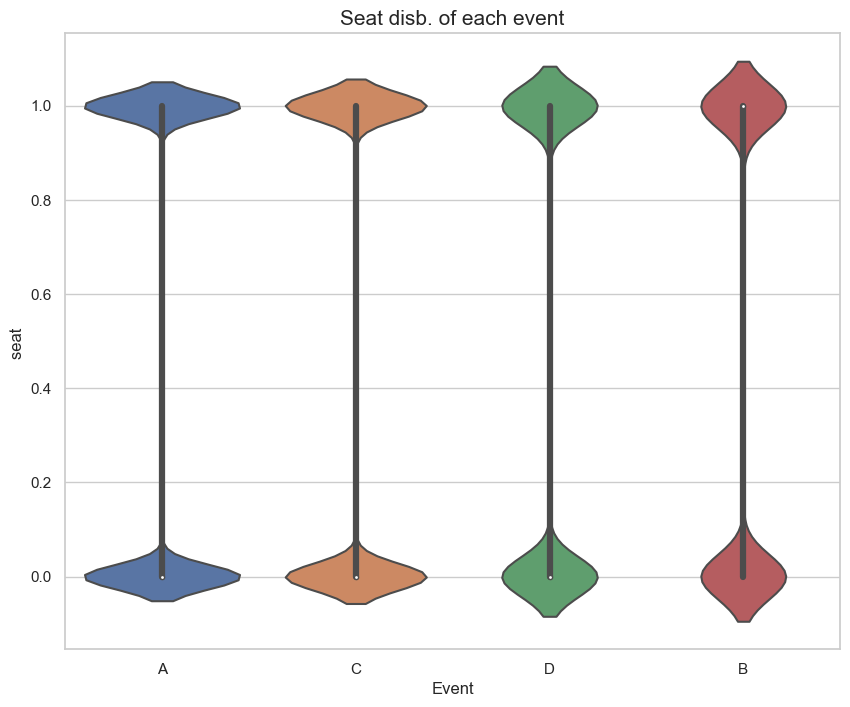

-------------------------------- Box Plot --------------------------------


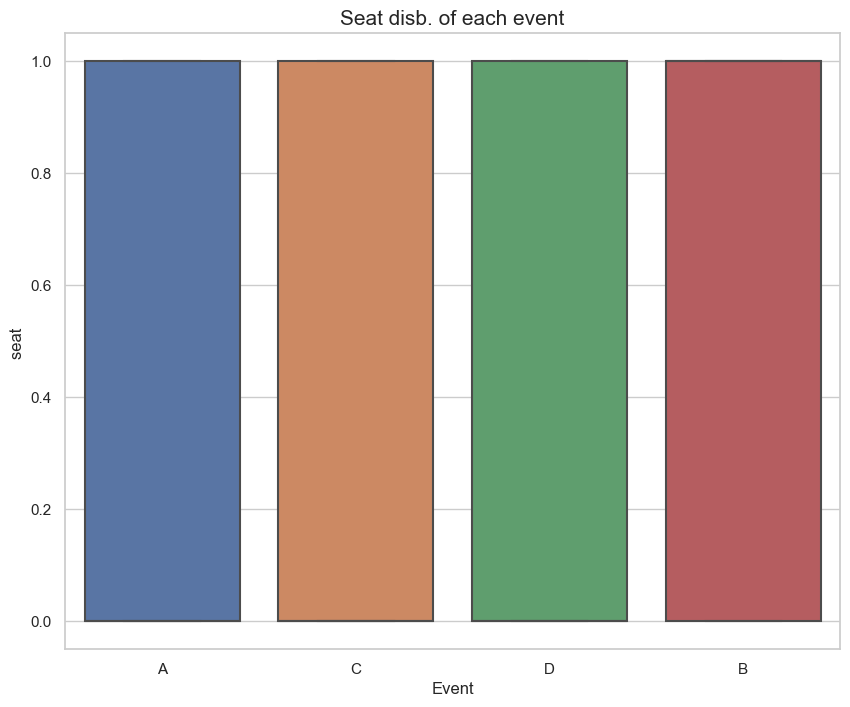

-------------------------------- PDF of time --------------------------------


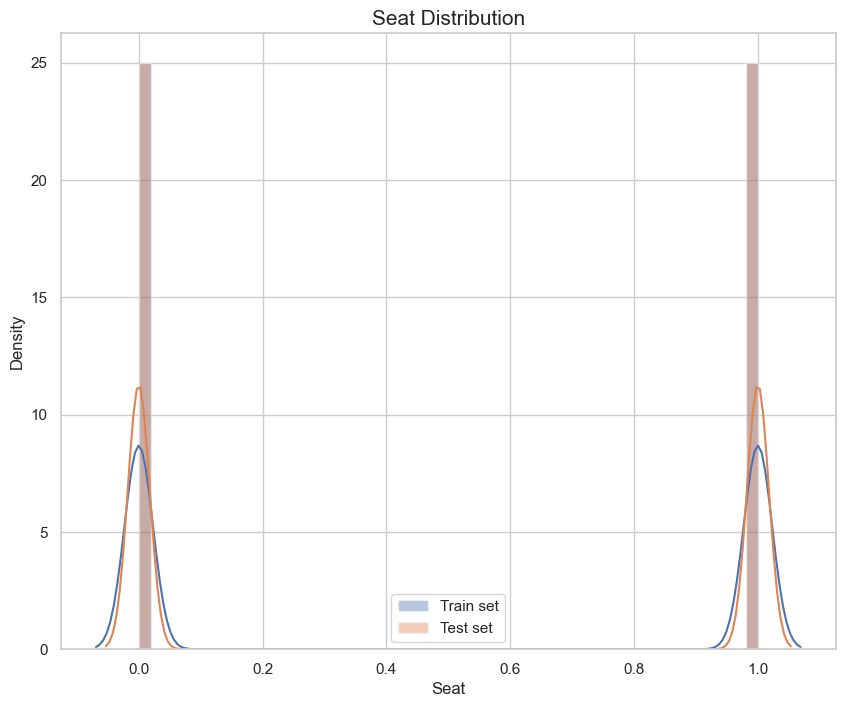

In [23]:
#-------------------------------- Seat

print("-------------------------------- Violen Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.violinplot(x='event', y='seat', data=train_data)
plt.ylabel("seat ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Seat disb. of each event", fontsize=15)
plt.show()


print("-------------------------------- Box Plot --------------------------------")
plt.figure(figsize=(10,8))
sns.boxplot(x='event', y='seat', data=train_data)
plt.ylabel("seat ", fontsize=12)
plt.xlabel("Event", fontsize=12)
plt.title("Seat disb. of each event", fontsize=15)
plt.show()

print("-------------------------------- PDF of time --------------------------------")
plt.figure(figsize=(10,8))
sns.distplot(train_data['seat'], label='Train set')
sns.distplot(test_data['seat'], label='Test set')
plt.legend()
plt.xlabel("Seat", fontsize=12)
plt.title("Seat Distribution", fontsize=15)
plt.show()



* We can conclude that for seat column, the values are either 0 or 1.




-------------------------------- Violen Plot --------------------------------


100%|██████████████████████████████████████████| 20/20 [37:06<00:00, 111.34s/it]


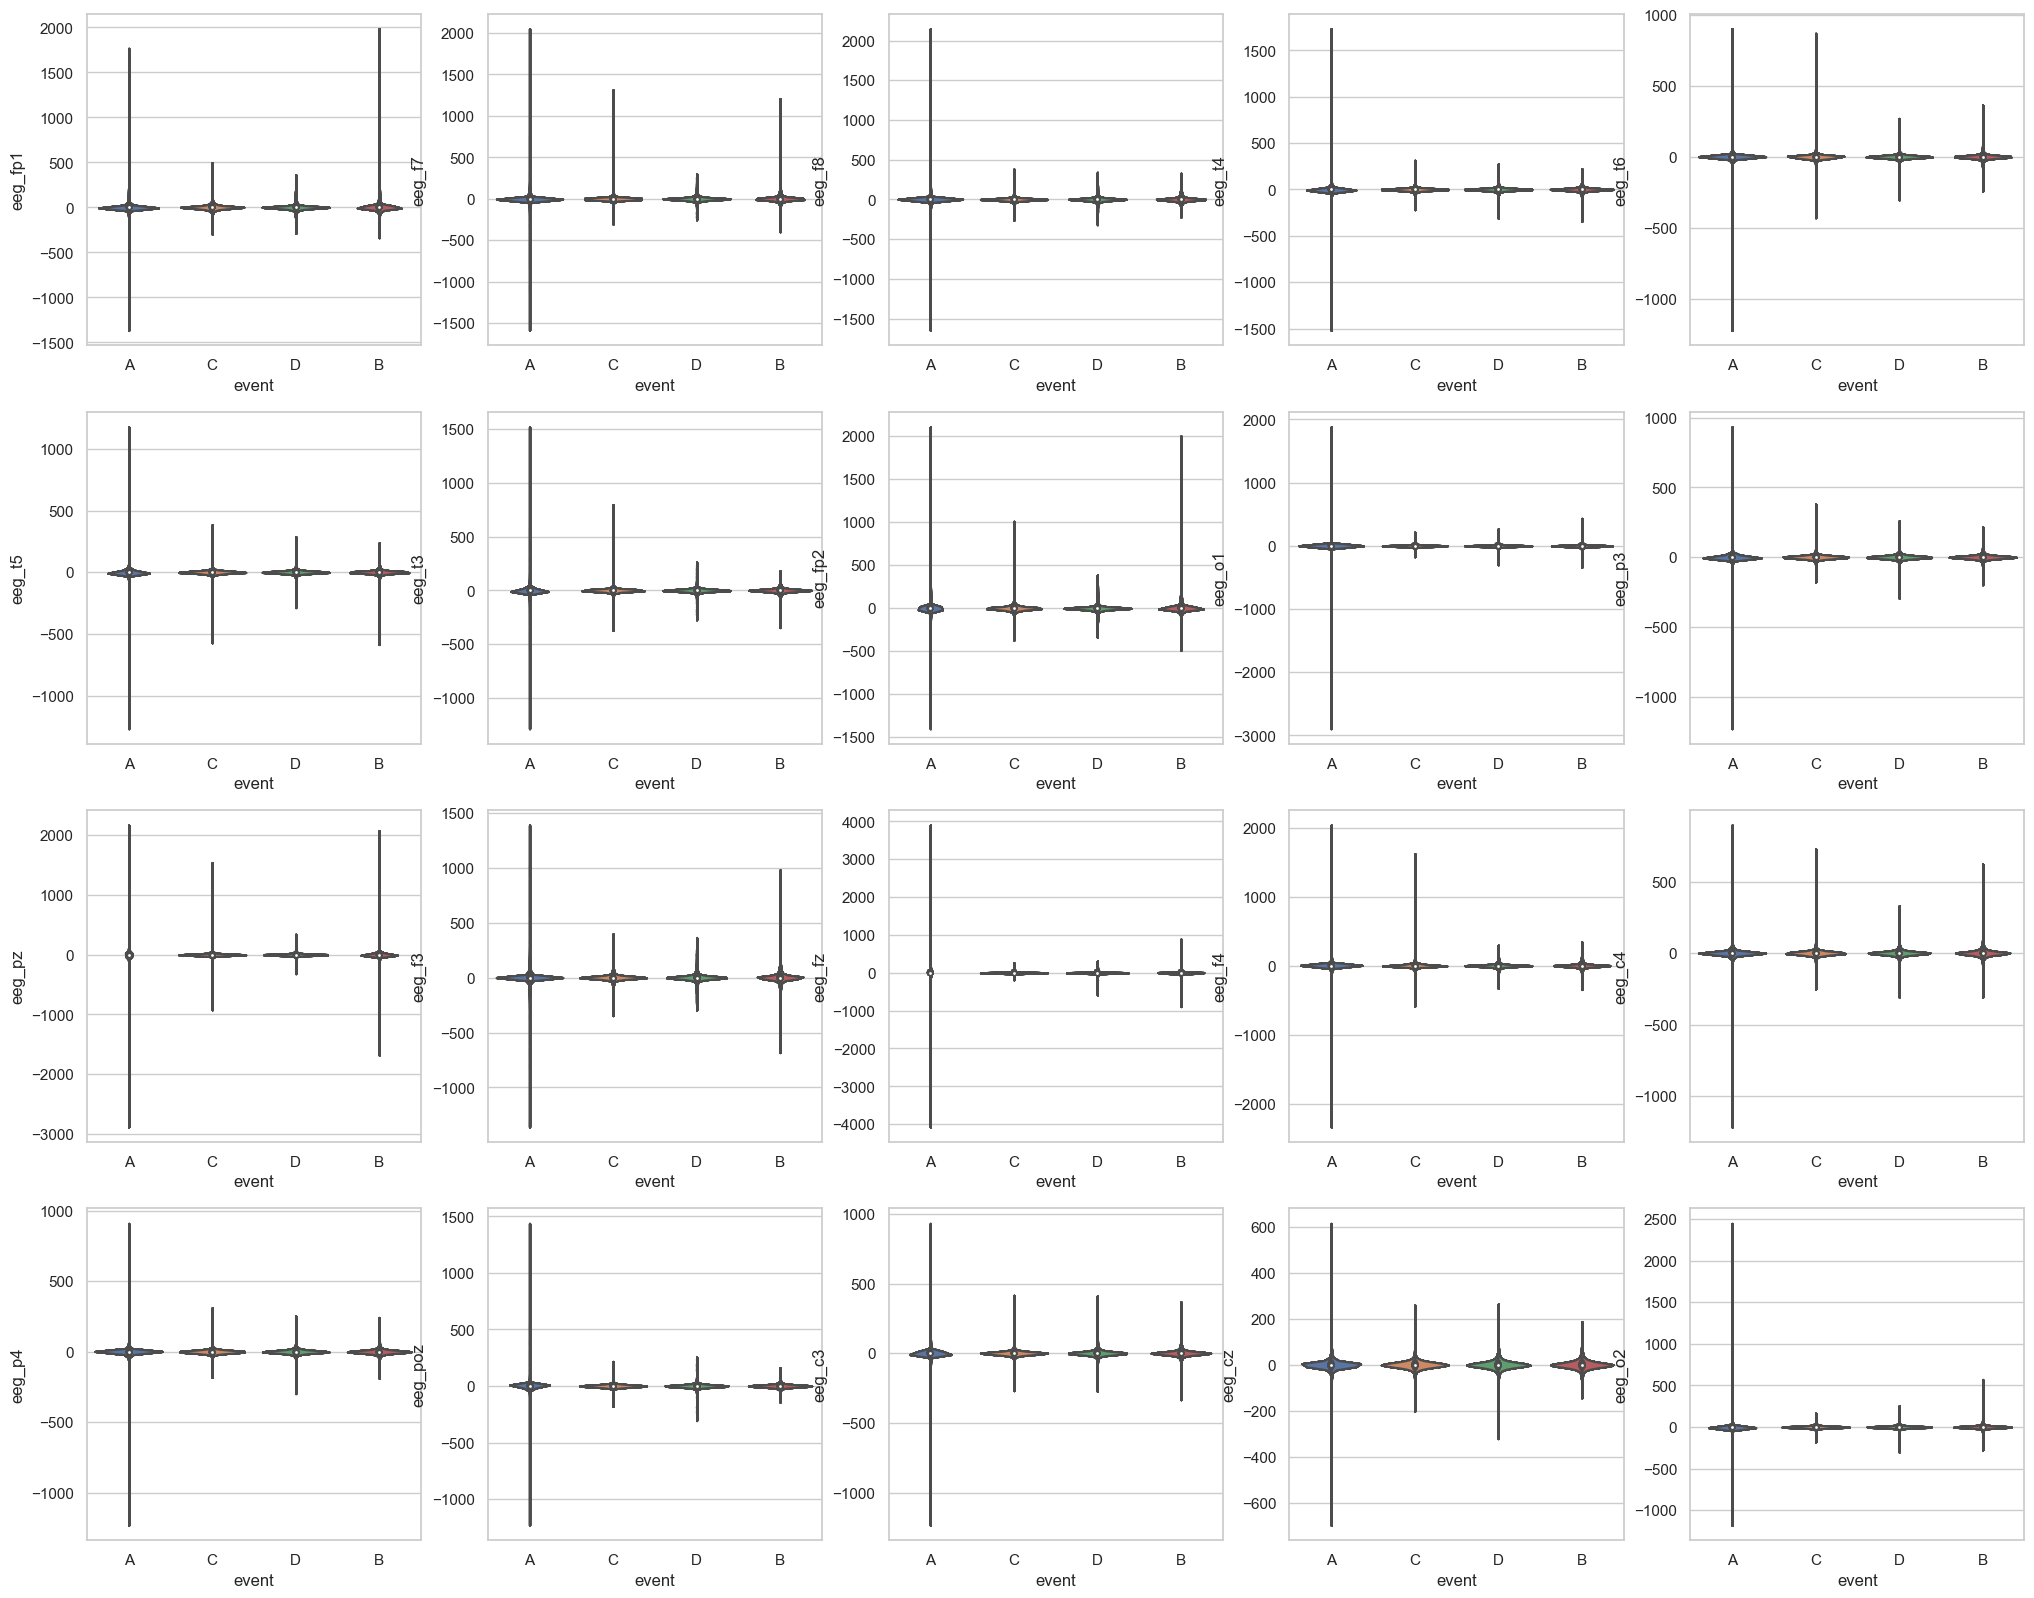

-------------------------------- Box Plot --------------------------------


100%|███████████████████████████████████████████| 20/20 [10:31<00:00, 31.57s/it]


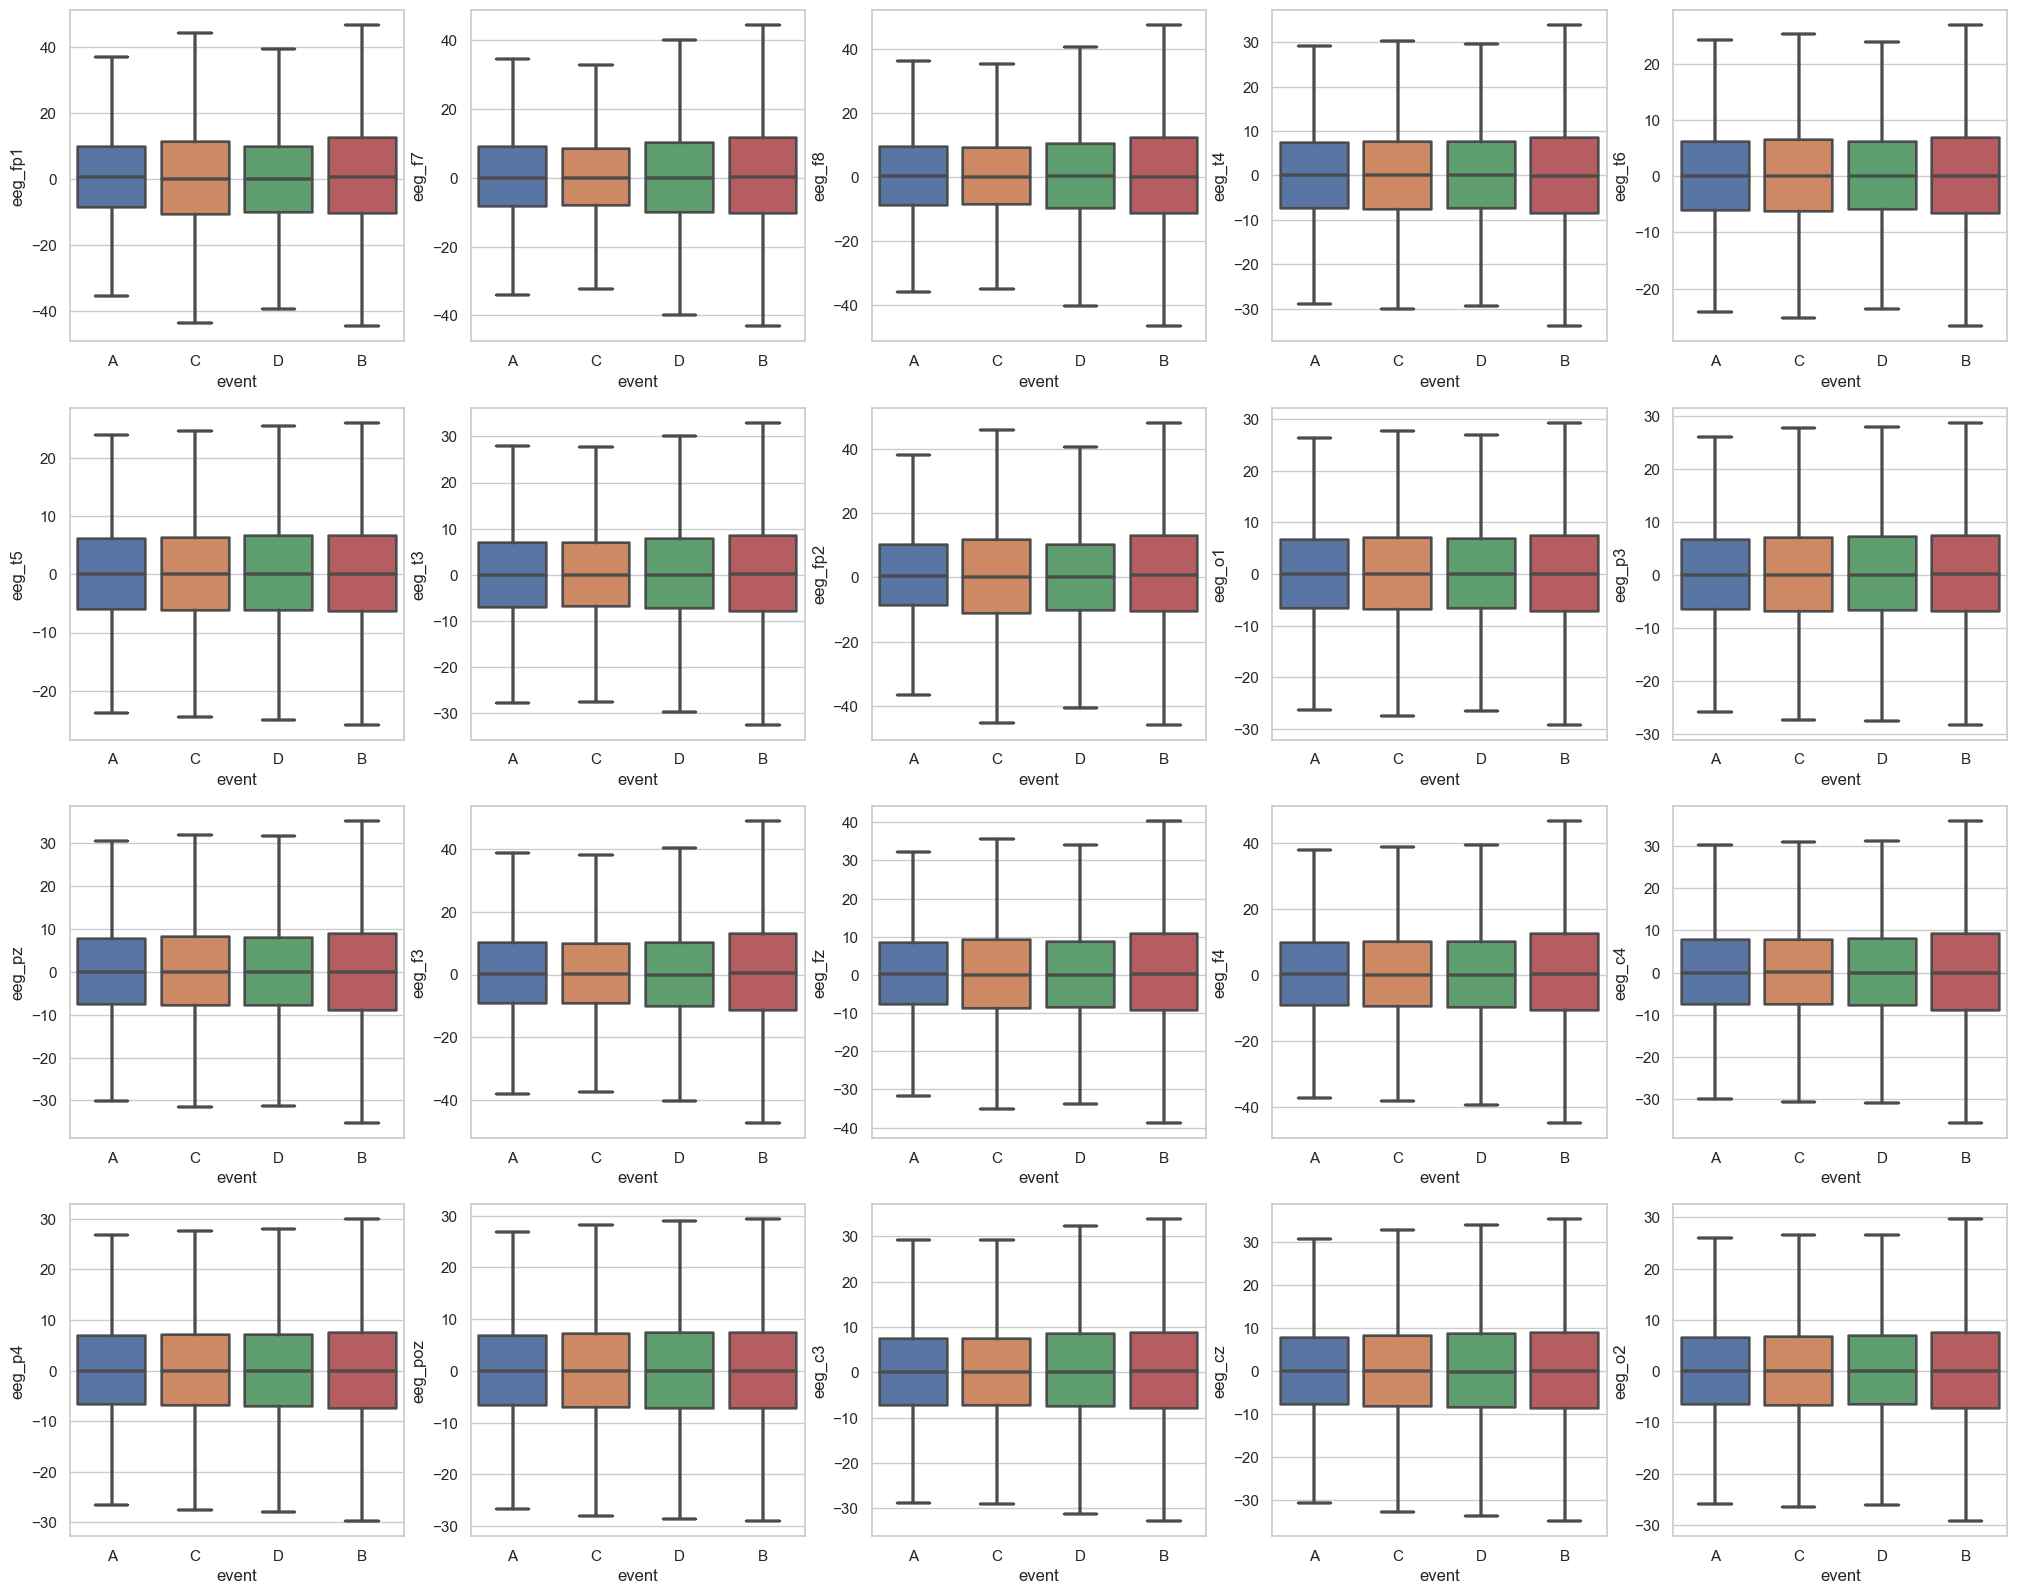

-------------------------------- PDF of time --------------------------------


100%|███████████████████████████████████████████| 20/20 [12:42<00:00, 38.13s/it]


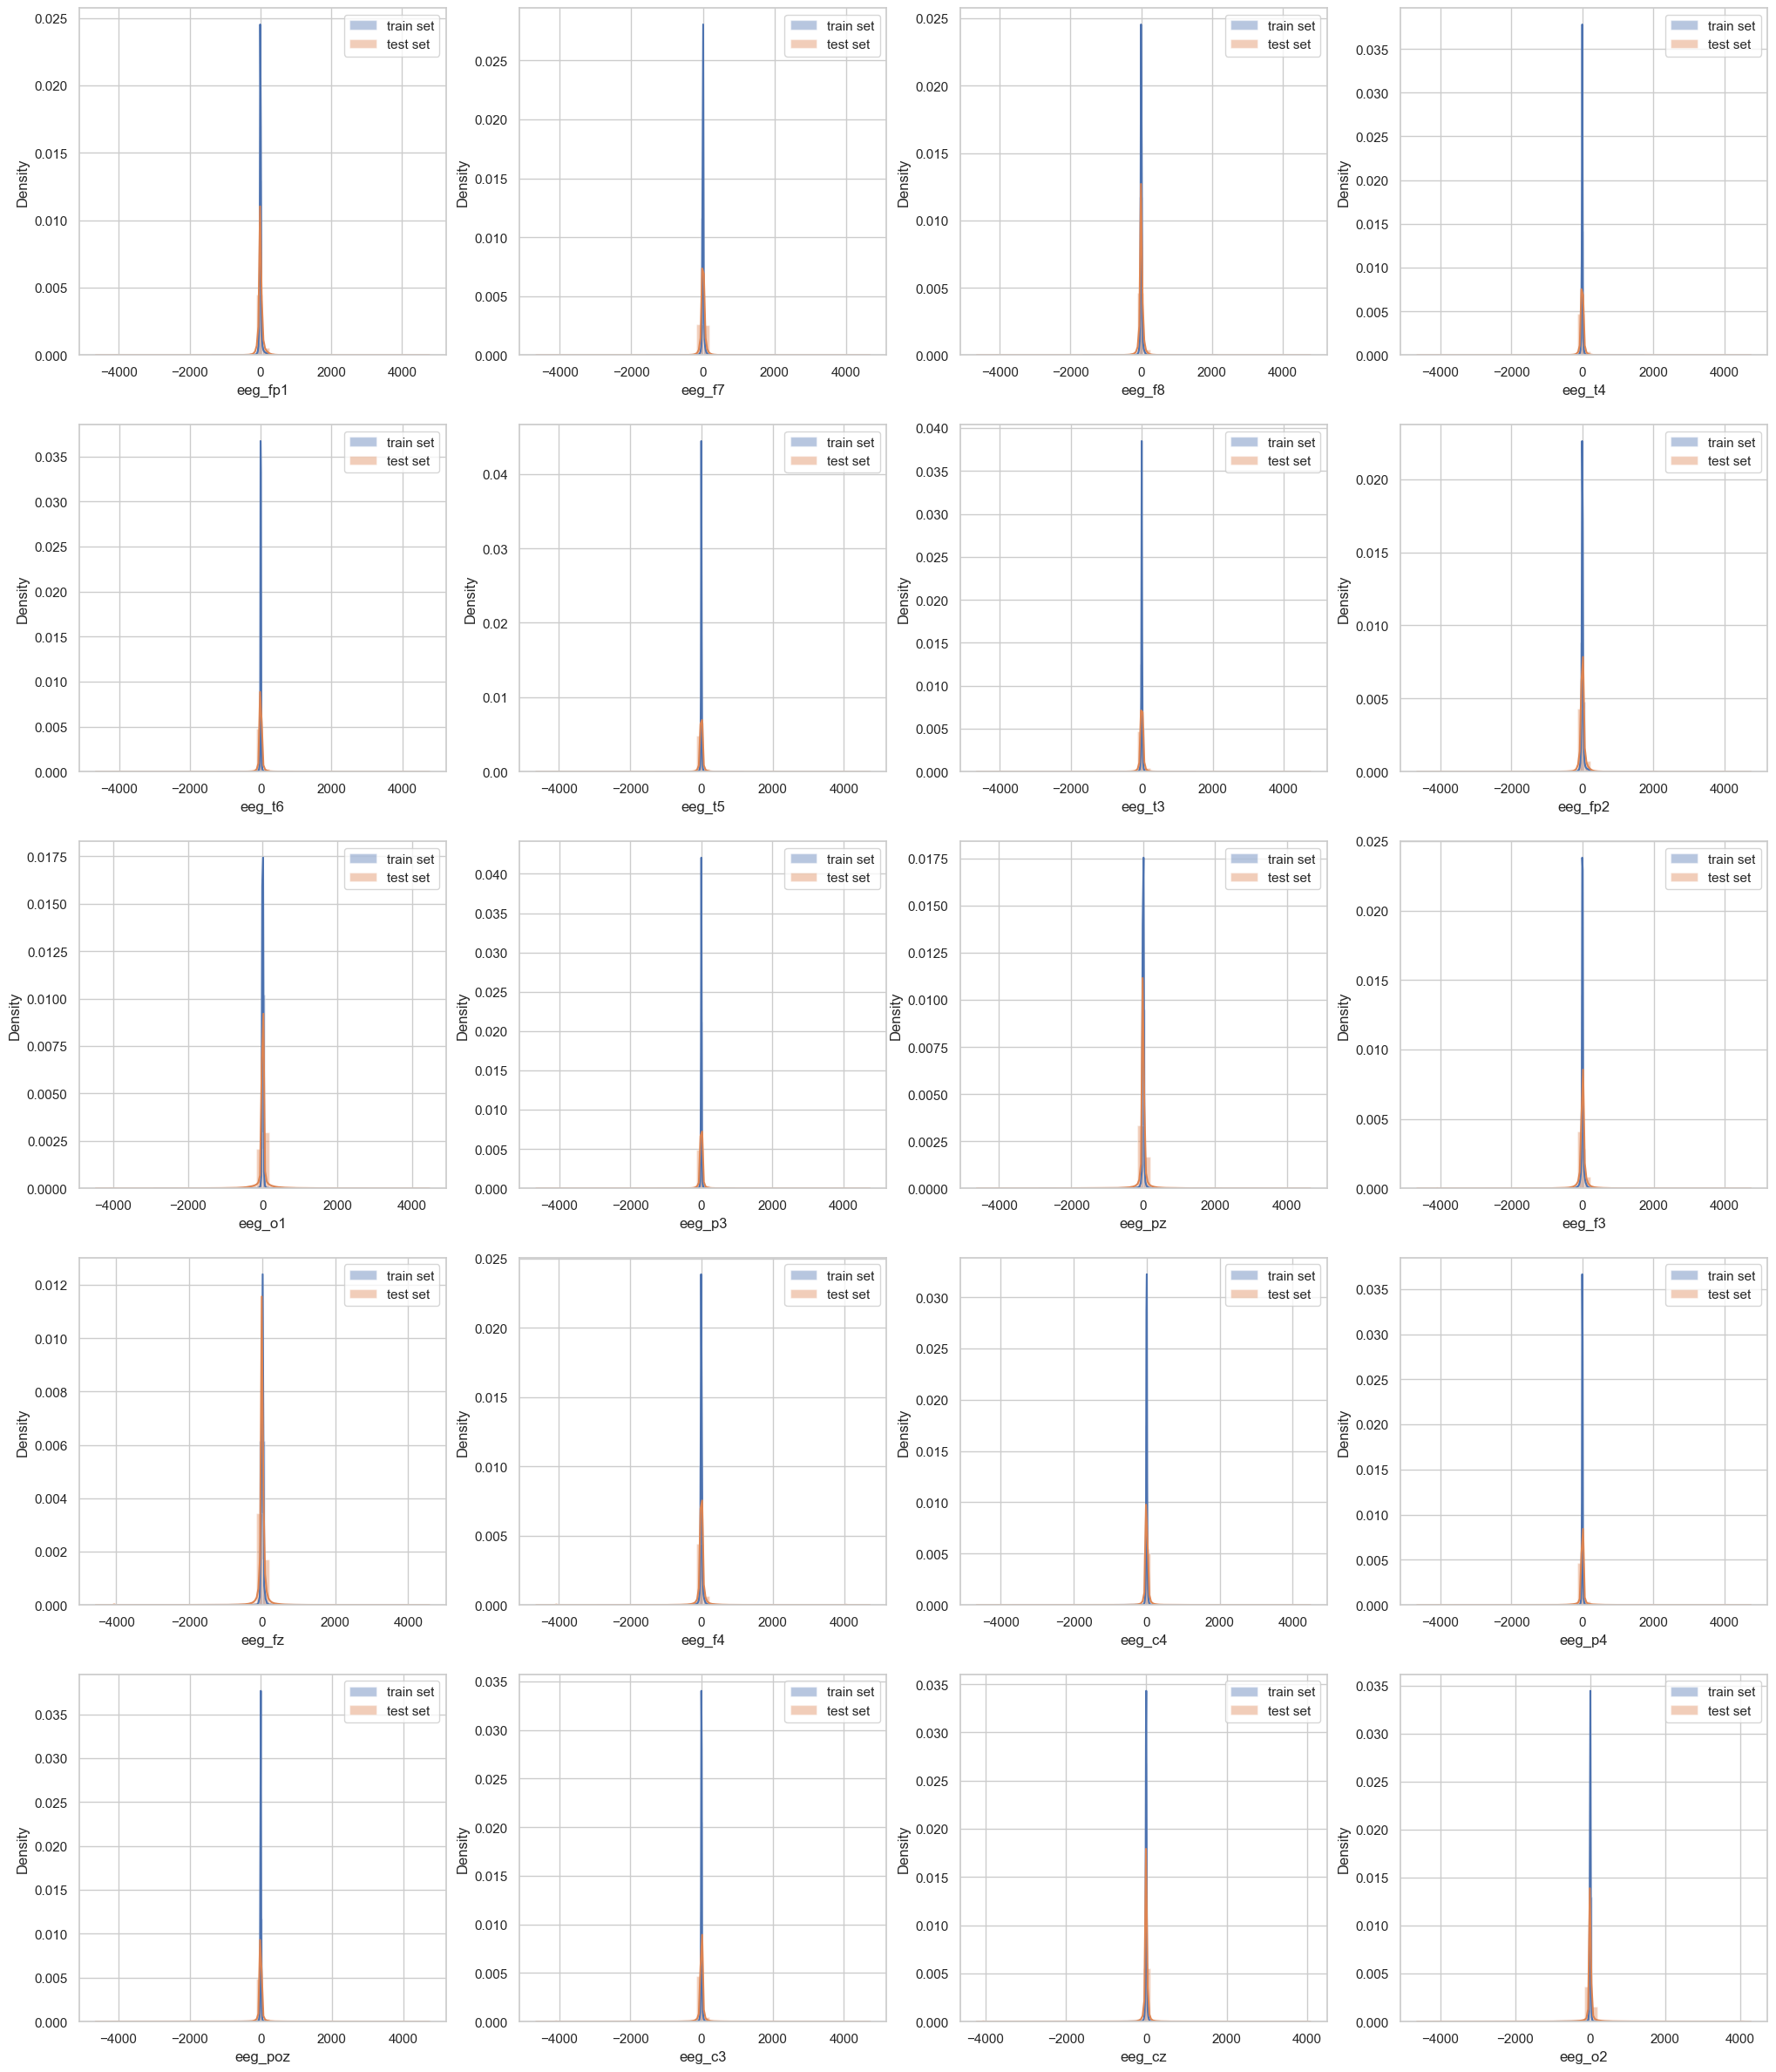

In [19]:
#-------------------------------- EEG
eeg_features = ["eeg_fp1", "eeg_f7", "eeg_f8", "eeg_t4", "eeg_t6", "eeg_t5", "eeg_t3", "eeg_fp2", "eeg_o1",
                "eeg_p3", "eeg_pz", "eeg_f3", "eeg_fz", "eeg_f4", "eeg_c4", "eeg_p4", "eeg_poz", "eeg_c3", "eeg_cz", "eeg_o2"]
print("-------------------------------- Violen Plot --------------------------------")
plt.figure(figsize=(25,25))
plt.title("All EGG Reading Violin Plot ",fontsize=20)
for i in tqdm(range(len(eeg_features))):
  for i,egg in enumerate(eeg_features):
    plt.subplot(5,5,i+1)
    sns.violinplot(x='event',y=egg,data=train_data,showfliers=False)
plt.show()

print("-------------------------------- Box Plot --------------------------------")
plt.figure(figsize=(25,25))
plt.title("All EGG Reading Box Plot ",fontsize=20)
for i in tqdm(range(len(eeg_features))):
  for i,egg in enumerate(eeg_features):
    plt.subplot(5,5,i+1)
    sns.boxplot(x='event',y=egg,data=train_data,showfliers=False)
plt.show()

print("-------------------------------- PDF of time --------------------------------")
plt.figure(figsize=(25,30))
frame=0
for i in tqdm(range(len(eeg_features))):
  frame+=1
  plt.subplot(5,4,frame)
 
  sns.distplot(train_data[eeg_features[i]], label='train set')
  sns.distplot(test_data[eeg_features[i]], label='test set')
  plt.legend()
plt.show()



* From the EEG violin plots, we can conclude that the mean is 0 and variance is less than 500. So we can consider it to be nearly normally distributed.


*   From box plot, we can concludee that almost all pts lie in oone range so we can't simplyuse a threshold and classify the events.

*   PDF of Train and Test EGG data follow normal distribution but test data have a bigger peak at zero(0) and more variance in test data





#Observation from EDA
There are 27 features are present in the dataset.
There is an imbalance in the given dataset.
There are no missing values in this dataset
ECG violin plot has about the same data we are not getting much information from that but if we see signal reading plots which show as different for every event.
EEG Reading violin plot is about the same for every event, if we see EEG signal plot we will differ between every event on the different electrode on the scalp.
Respiration and GSR have about the same story as ECG and EEG plots